In [1]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, roc_curve, roc_auc_score,log_loss,classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder,MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, LogisticRegression, LinearRegression
from sklearn.compose import make_column_transformer, make_column_selector
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
import warnings

from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import BaggingRegressor


In [3]:
cancer = pd.read_csv('BreastCancer.csv',index_col=0)

In [5]:
X = cancer.drop('Class',axis=1)
y = cancer['Class']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=24,test_size=0.3,stratify=y)

In [11]:
rf = RandomForestClassifier(n_estimators=10, random_state=24)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9666666666666667

In [13]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred_prob)

0.9938607085346216

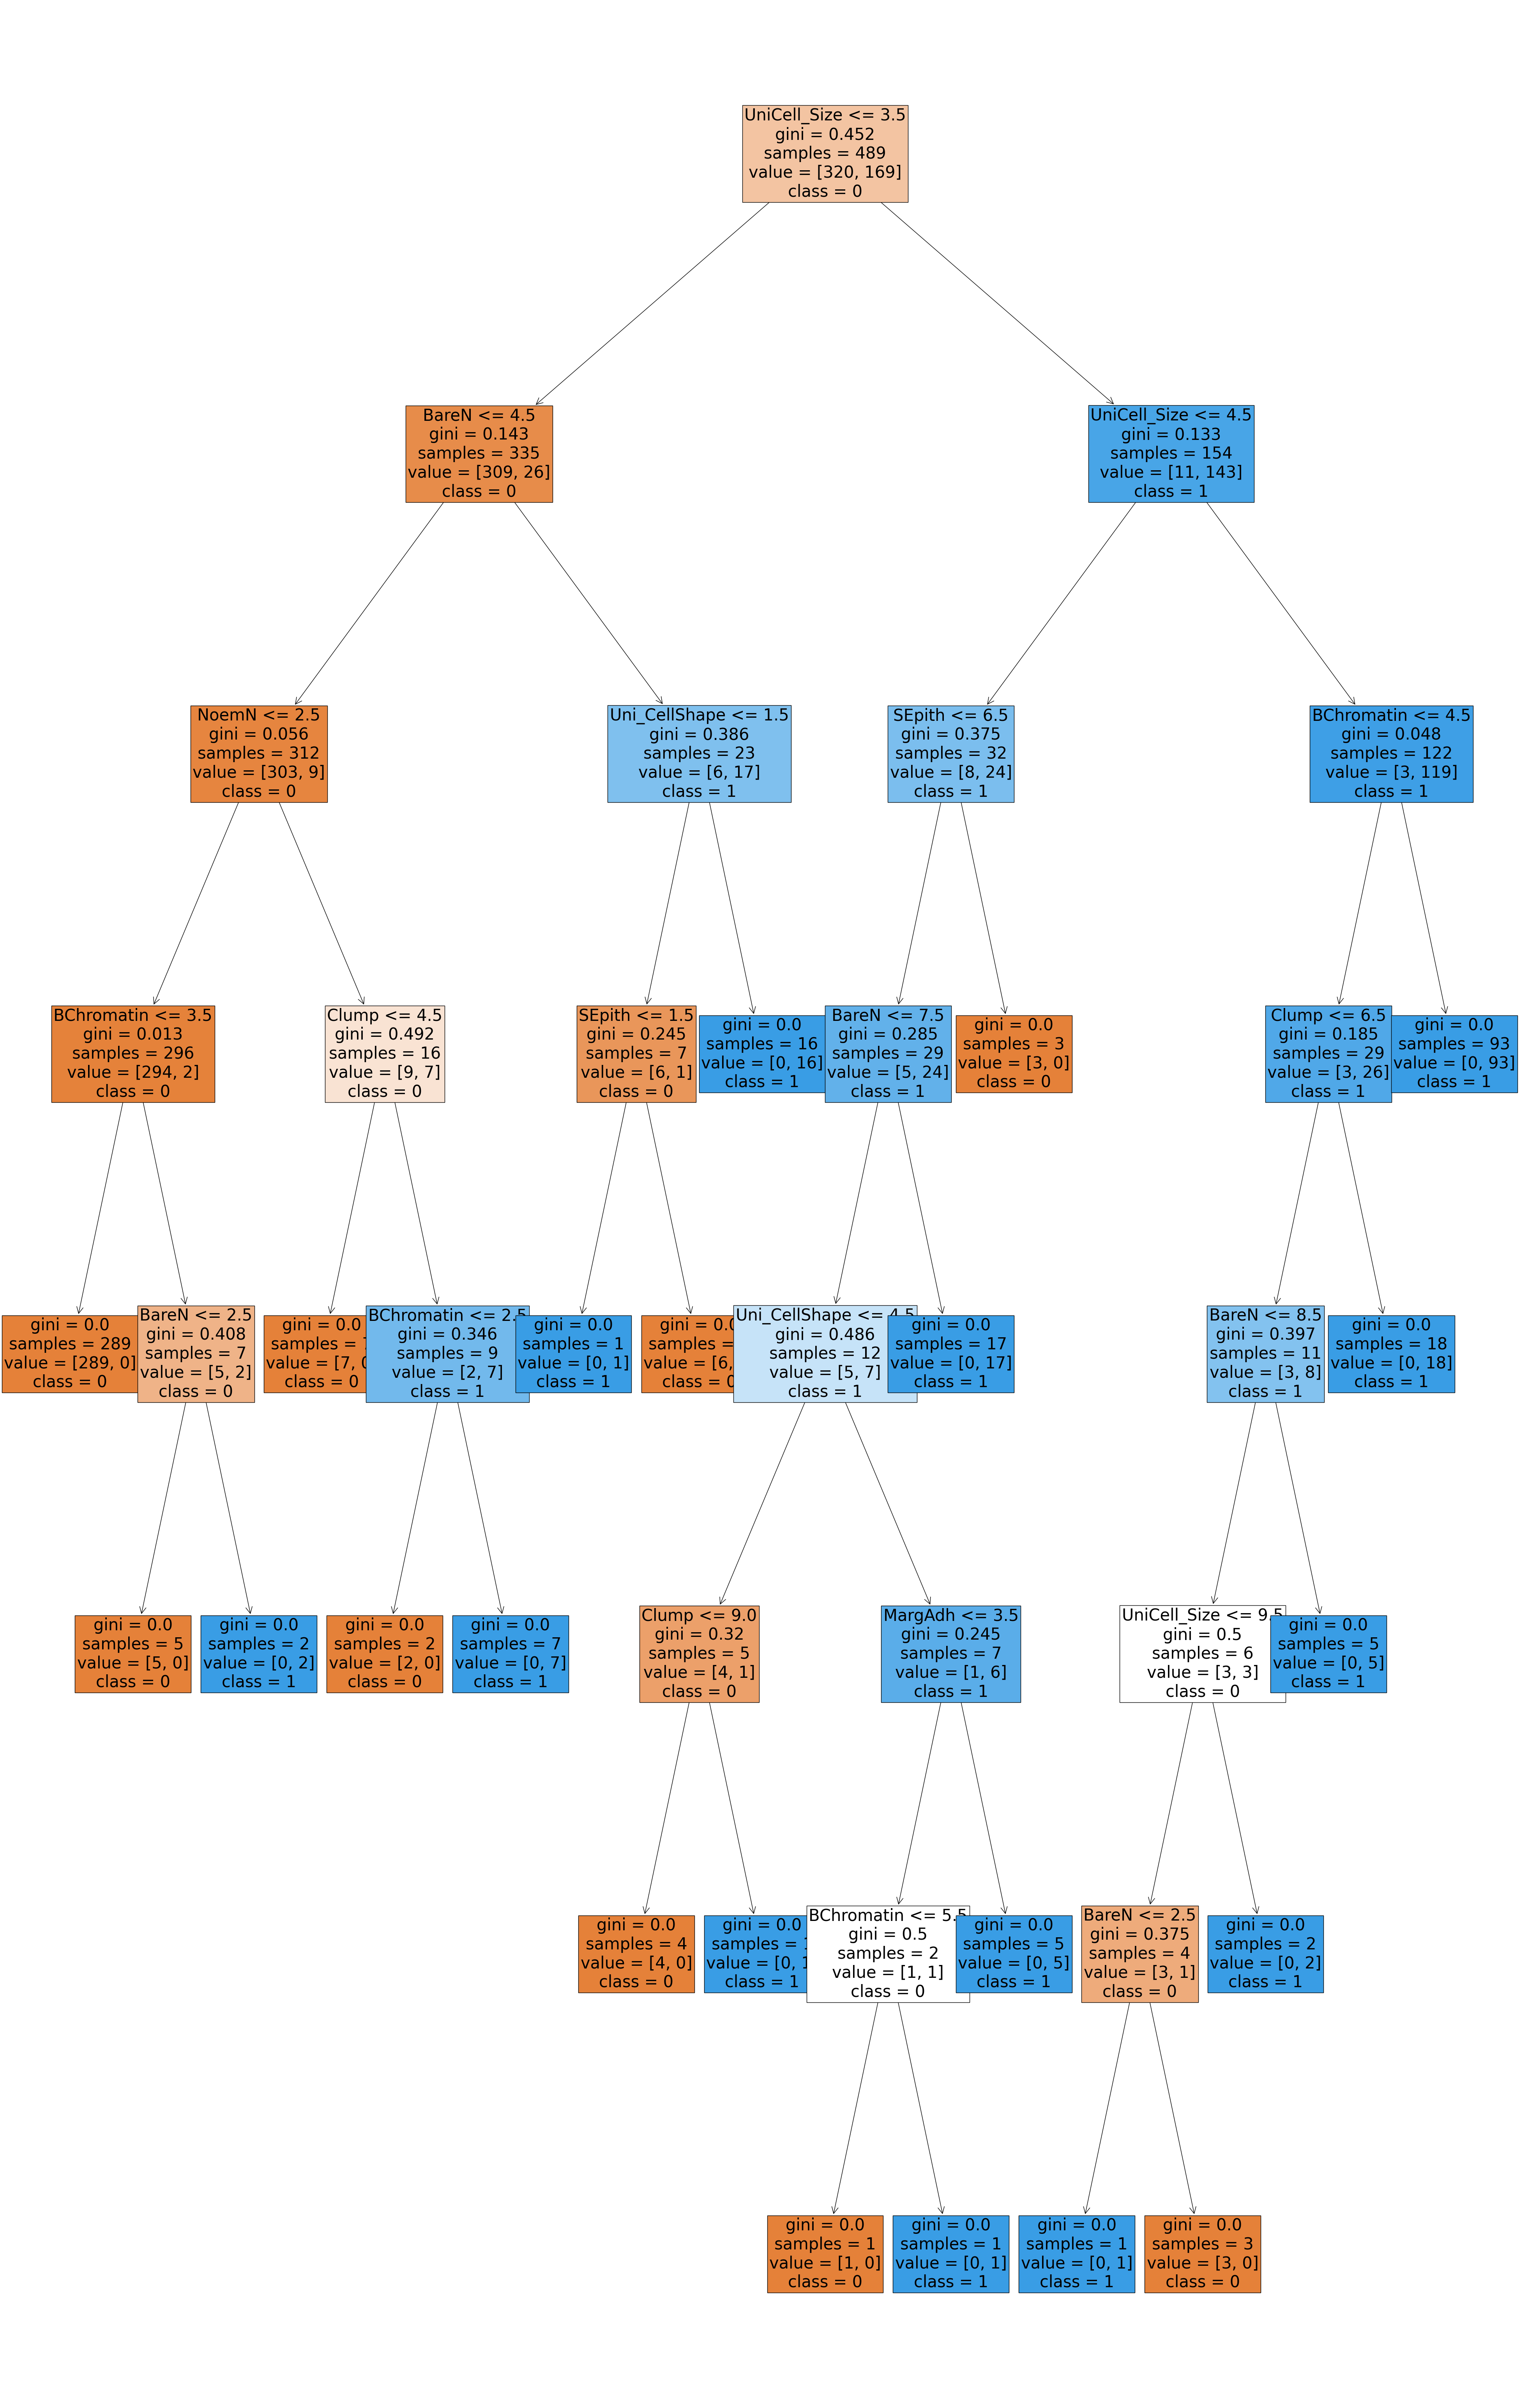

In [15]:
dtc = DecisionTreeClassifier( random_state = 24)
dtc.fit(X_train,y_train)
plt.figure(figsize=(50,80))
plot_tree(dtc,feature_names = list(X.columns),class_names = ['0','1'], filled = True, fontsize= 30)
plt.show()

In [25]:
params = {'max_depth':[2,3,4,5,6,None]}

kfold = StratifiedKFold(n_splits = 5,shuffle = True,random_state =24)

In [27]:
gcv = GridSearchCV(dtc,param_grid = params, cv = kfold, scoring = 'roc_auc',verbose = 3)
gcv.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .......................max_depth=2;, score=0.952 total time=   0.0s
[CV 2/5] END .......................max_depth=2;, score=0.940 total time=   0.0s
[CV 3/5] END .......................max_depth=2;, score=0.961 total time=   0.0s
[CV 4/5] END .......................max_depth=2;, score=0.942 total time=   0.0s
[CV 5/5] END .......................max_depth=2;, score=0.938 total time=   0.0s
[CV 1/5] END .......................max_depth=3;, score=0.972 total time=   0.0s
[CV 2/5] END .......................max_depth=3;, score=0.946 total time=   0.0s
[CV 3/5] END .......................max_depth=3;, score=0.941 total time=   0.0s
[CV 4/5] END .......................max_depth=3;, score=0.954 total time=   0.0s
[CV 5/5] END .......................max_depth=3;, score=0.951 total time=   0.0s
[CV 1/5] END .......................max_depth=4;, score=0.988 total time=   0.0s
[CV 2/5] END .......................max_depth=4;,

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None]}, scoring='roc_auc',
             verbose=3)

In [29]:
best_model = gcv.best_estimator_

In [31]:
df_imp = pd.DataFrame({'feature':list(X.columns),
             'importance': best_model.feature_importances_})

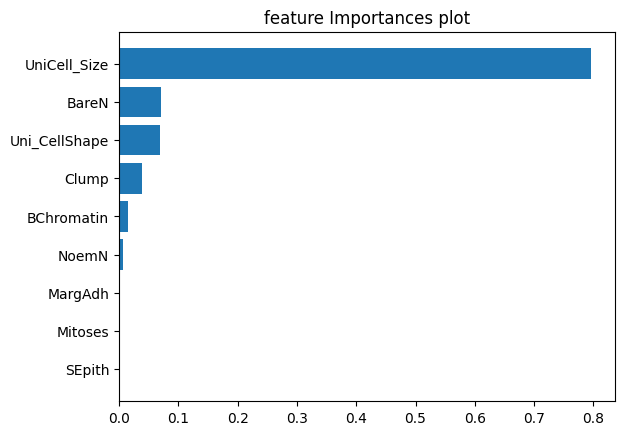

In [33]:
df_imp.sort_values('importance', inplace = True)
plt.barh(df_imp['feature'],df_imp['importance'])
plt.title("feature Importances plot")
plt.show()

In [35]:
rf = RandomForestClassifier(n_estimators=10, random_state=24)
params = {'max_depth':[2,3,4,5,6,None]}

kfold = StratifiedKFold(n_splits = 5,shuffle = True,random_state =24)
gcv = GridSearchCV(rf,param_grid = params, cv = kfold, scoring = 'roc_auc',verbose = 3)
gcv.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .......................max_depth=2;, score=0.995 total time=   0.0s
[CV 2/5] END .......................max_depth=2;, score=0.983 total time=   0.0s
[CV 3/5] END .......................max_depth=2;, score=0.986 total time=   0.0s
[CV 4/5] END .......................max_depth=2;, score=0.980 total time=   0.0s
[CV 5/5] END .......................max_depth=2;, score=0.987 total time=   0.0s
[CV 1/5] END .......................max_depth=3;, score=0.994 total time=   0.0s
[CV 2/5] END .......................max_depth=3;, score=0.986 total time=   0.0s
[CV 3/5] END .......................max_depth=3;, score=0.985 total time=   0.0s
[CV 4/5] END .......................max_depth=3;, score=0.984 total time=   0.0s
[CV 5/5] END .......................max_depth=3;, score=0.988 total time=   0.0s
[CV 1/5] END .......................max_depth=4;, score=0.990 total time=   0.0s
[CV 2/5] END .......................max_depth=4;,

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=10, random_state=24),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None]}, scoring='roc_auc',
             verbose=3)

In [37]:
best_model = gcv.best_estimator_

In [45]:
df_imp = pd.DataFrame({'feature':list(X.columns),
             'importance': best_model.feature_importances_})

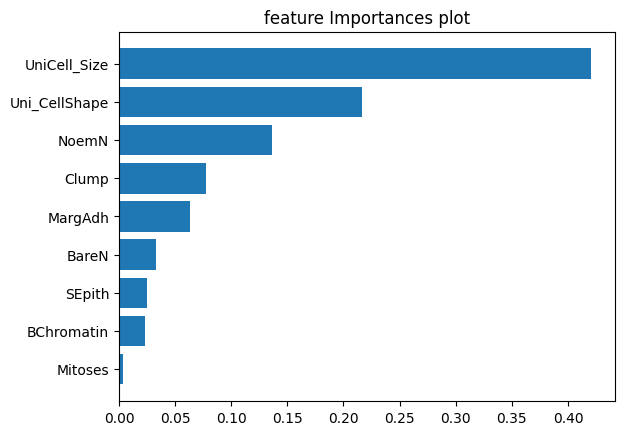

In [47]:
df_imp.sort_values('importance', inplace = True)
plt.barh(df_imp['feature'],df_imp['importance'])
plt.title("feature Importances plot")
plt.show()